In [1]:
from openai import OpenAI

import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = OpenAI()

In [3]:
client.responses.create(
    model='gpt-5-nano',
    input='hi'
)

Response(id='resp_0432a3151c4649f70069838a3fc93c8190bcb981088160d38c', created_at=1770228287.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-5-nano-2025-08-07', object='response', output=[ResponseReasoningItem(id='rs_0432a3151c4649f70069838a4032fc8190bd59da4e3686876e', summary=[], type='reasoning', content=None, encrypted_content=None, status=None), ResponseOutputMessage(id='msg_0432a3151c4649f70069838a434a9c8190a94df35a539a8405', content=[ResponseOutputText(annotations=[], text='Hi! How can I help you today? I can answer questions, explain concepts, help with writing or code, brainstorm ideas, plan a project, summarize articles, or just chat.\n\nIf you’re not sure where to start, tell me your goal or topic and I’ll jump in. Here are a few quick options:\n- Explain a concept you’re stuck on\n- Draft or edit a message, essay, or email\n- Debug or review code\n- Plan a trip, project, or schedule\n- Brainstorm ideas or outlines\n\nWhat would you like to 

In [4]:
response = client.embeddings.create(
    model='text-embedding-3-small',
    input=['hi']
)

In [5]:
data = np.array([item.embedding for item in response.data])

In [6]:
def embed(content: list[str]) -> np.array:
    response = client.embeddings.create(
        input=content,
        model='text-embedding-3-small'
    )
    return np.array([emb.embedding for emb in response.data])

In [7]:
data = embed(['hi', 'hello'])

In [8]:
data.shape

(2, 1536)

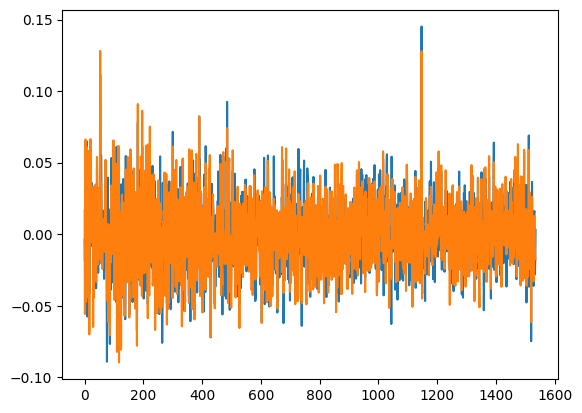

In [9]:
plt.plot(data.T)

In [10]:
data @ data.T

array([[1.00000005, 0.80845078],
       [0.80845078, 1.0000001 ]])

In [11]:
text = ['hi', 'hello', 'hola', 'oi', 'good bye', 'nihao', "'sup", 'thermodynamics', '2 * 7 = 4']

(0.0, 1.0)

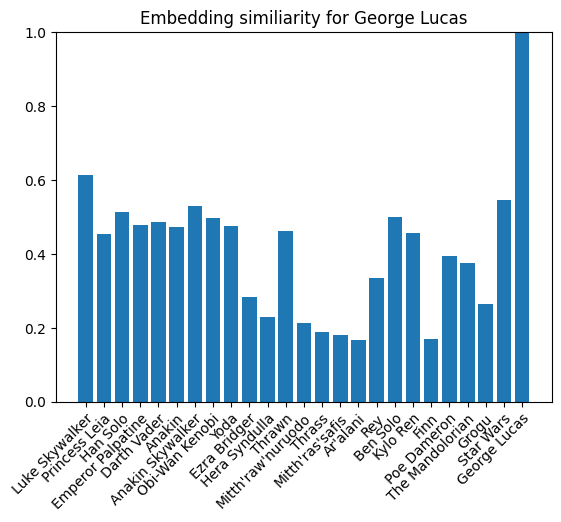

In [65]:
text = ["Luke Skywalker","Princess Leia","Han Solo","Emperor Palpatine","Darth Vader","Anakin","Anakin Skywalker","Obi-Wan Kenobi","Yoda","Ezra Bridger","Hera Syndulla","Thrawn","Mitth'raw'nuruodo","Thrass","Mitth'ras'safis","Ar'alani","Rey","Ben Solo","Kylo Ren","Finn","Poe Dameron","The Mandolorian","Grogu","Star Wars","George Lucas"]

data = embed(text)
sims = data @ data.T

index = 24
ax = plt.bar(x=range(len(text)), height=sims[index,:])
plt.xticks(range(len(text)), text, rotation=45, ha='right', rotation_mode='anchor')
plt.title('Embedding similiarity for ' + text[index])
plt.ylim([0, 1])

## Lookup

In [66]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [176]:

content_verses = []

with open('1Nephi2.txt') as file:
    while content := file.read(1000):
        content_verses.append(content)


In [177]:
content_verses

['Now behold, I say unto you that if ye will return unto\nJerusalem ye shall also perish with them. And now, if ye have\nchoice, go up to the land, and remember the words which I speak\nunto you, that if ye go ye will also perish; for thus the Spirit\nof the Lord constraineth me that I should speak.\nAnd it came to pass that when I, Nephi, had spoken these\nwords unto my brethren, they were angry with me. And it came to\npass that they did lay their hands upon me, for behold, they were\nexceedingly wroth, and they did bind me with cords, for they\nsought to take away my life, that they might leave me in the\nwilderness to be devoured by wild beasts.\nBut it came to pass that I prayed unto the Lord, saying: O\nLord, according to my faith which is in thee, wilt thou deliver\nme from the hands of my brethren; yea, even give me strength that\nI may burst these bands with which I am bound.\nAnd it came to pass that when I had said these words, behold,\nthe bands were loosed from off my hand

In [178]:
content_embeds = embed(content_verses)

In [174]:
content_embeds.shape

(203, 1536)

In [144]:
query = embed(['build boat'])

In [127]:
query.shape

(1, 1536)

In [150]:
query @ content_embeds.T

array([[ 0.11330283,  0.11808928,  0.16620669,  0.143855  ,  0.21311533,
         0.11233718,  0.15775625,  0.07995332,  0.1412782 ,  0.06743302,
         0.06985737,  0.0998683 ,  0.13356059,  0.12477414,  0.12222655,
         0.096666  ,  0.07448392,  0.18270953,  0.14129485,  0.05458992,
         0.10770882,  0.13767   ,  0.12266375,  0.08665766,  0.10185012,
         0.14183757,  0.1440431 ,  0.1799531 ,  0.15507223,  0.16889752,
         0.08200121,  0.16197752,  0.1246644 ,  0.18181667,  0.08366174,
         0.10712865,  0.04115802,  0.15670718,  0.15043328,  0.18223674,
         0.08121291,  0.19112574,  0.14456469,  0.14540338,  0.13836813,
         0.14642816,  0.11298022,  0.08056582,  0.18895015,  0.14965837,
         0.09939587,  0.13422584,  0.09335608,  0.1908094 ,  0.14541299,
         0.10270811,  0.13173558,  0.10579036,  0.15034294,  0.17768178,
         0.15085746,  0.1580726 ,  0.17215949,  0.14793385,  0.15039008,
         0.09362373,  0.18370084,  0.17604813,  0.2

In [151]:
def get_verses(phrase, threshold = 0.6):
    embedding = embed([phrase])
    scores = content_embeds @ embedding.T
    return np.array(content_verses)[scores.flatten() > threshold]

In [179]:
get_verses('build boat', threshold=0.3)

array([' ore which I\ndid molten out of the rock.\nAnd when my brethren saw that I was about to build a ship,\nthey began to murmur against me, saying: Our brother is a fool,\nfor he thinketh that he can build a ship; yea, and he also\nthinketh that he can cross these great waters.\nAnd thus my brethren did complain against me, and were\ndesirous that they might not labor, for they did not believe that\nI could build a ship; neither would they believe that I was\ninstructed of the Lord.\nAnd now it came to pass that I, Nephi, was exceedingly\nsorrowful because of the hardness of their hearts; and now when\nthey saw that I began to be sorrowful they were glad in their\nhearts, insomuch that they did rejoice over me, saying: We knew\nthat ye could not construct a ship, for we knew that ye were\nlacking in judgment; wherefore, thou canst not accomplish so\ngreat a work.\nAnd thou art like unto our father, led away by the foolish\nimaginations of his heart; yea, he hath led us out of the l